http://fourier.eng.hmc.edu/e176/lectures/ch7/node11.html                                                                    
https://towardsdatascience.com/bias-variance-and-regularization-in-linear-regression-lasso-ridge-and-elastic-net-8bf81991d0c5  
https://www.statlect.com/fundamentals-of-statistics/Gauss-Markov-theorem                                                    
https://www.investopedia.com/ask/answers/042415/what-difference-between-standard-error-means-and-standard-deviation.asp
https://stats.stackexchange.com/questions/184998/the-linearity-of-variance                                                    
https://wiseodd.github.io/techblog/2017/01/26/kl-mle/
http://www.unm.edu/~jikaczmarski/working_papers/gm_proof.pdf
https://youtu.be/QIktmPA8nb0?list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&t=3396

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator

In [2]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_x(xx, p, sk_or_mine='sklearn'):
    if sk_or_mine == 'sklearn':
        p = PolynomialFeatures(degree=p)
        return p.fit_transform(xx)
    else: 
        x_powers = [xx**(p+1) for p in range(p)]
        x_concated = np.hstack((np.array(x_powers)))
    #     print(x_concated.shape, xx.shape, p)
        return x_concated.reshape(xx.shape[0], xx.shape[1]*p)

In [3]:
def cent_normalize(*args):
    for xx in args:
        yield xx - xx.mean(0)

In [4]:
def generate_data_of_degree(p=1, m=100, n=1, sk_or_mine='sklearn'):
    '''
    m - number of examples
    p - max power of polynomial
    n - features of x
    '''
#     x = np.sort((2 - 3 * np.random.normal(0, 1, (m,n))),axis=0)
#     x = 3 - 2 * np.random.uniform(1, 2, (m,n))
#     x = np.linspace(0, 1, m*n).reshape(m,n)
    x = 3*np.random.normal(0,1,(m,n))
    x /= x.max()
    x_polyn = polynomial_x(x, p, 'sklearn')
    W = np.random.uniform(2, 3, (x_polyn.shape[1], 1))
    b = np.random.uniform(2, 3, (m, 1))
    
    y = b - x_polyn@W
    return y/y.max(), x

In [5]:
y_1, x_1 = cent_normalize(*generate_data_of_degree(p=1, m=30, n=1))
y_2, x_2 = cent_normalize(*generate_data_of_degree(p=2, m=30, n=1))
y_3, x_3 = cent_normalize(*generate_data_of_degree(p=3, m=30, n=1))
y_5, x_5 = cent_normalize(*generate_data_of_degree(p=5, m=30, n=1))

y_1_test, x_1_test = cent_normalize(*generate_data_of_degree(p=1, m=30, n=1))
y_2_test, x_2_test = cent_normalize(*generate_data_of_degree(p=2, m=30, n=1))
y_3_test, x_3_test = cent_normalize(*generate_data_of_degree(p=3, m=30, n=1))
y_5_test, x_5_test = cent_normalize(*generate_data_of_degree(p=5, m=30, n=1))

In [6]:
def OLS(X, y):
    '''
    pseudoinverse with SVD
    '''
    U,E,V_T = np.linalg.svd(X)
    sigmas_plus = np.zeros((X.shape[0], X.shape[1])).T
    sigmas_plus[:E.shape[0], :E.shape[0]] = np.linalg.inv(np.diag(E))
    return V_T.T@sigmas_plus@U.T@y

In [7]:
def regularized_OLS(X, y, lamda=0.1):
    return np.linalg.inv(X.T@X + lamda*np.eye(X.shape[1], X.shape[1]))@X.T@y

In [8]:
OLS(x_1, y_1), regularized_OLS(x_1, y_1, lamda=0)

(array([[-1.18307848]]), array([[-1.18307848]]))

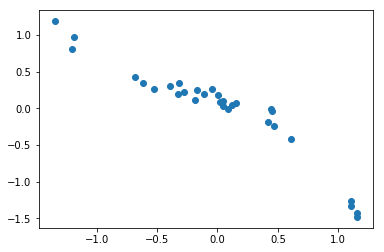

In [9]:
# train
plt.scatter(x_3, y_3)

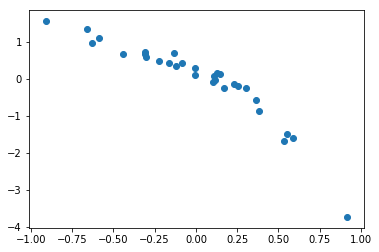

In [10]:
# test
plt.scatter(x_3_test, y_3_test)

In [11]:
# w_1 = OLS(x_1, y_1)
w_1_reg = regularized_OLS(x_1, y_1, lamda=0.02)
w_2_reg = regularized_OLS(x_2, y_2, lamda=0.02)
w_3_reg = regularized_OLS(x_3, y_3, lamda=0.02)
w_5_reg = regularized_OLS(x_5, y_5, lamda=0.02)

In [12]:
def plot_data_with_prediction(xx, yy, pred, title=''):
    plt.figure()
    plt.scatter(xx, yy, s=None, marker='.', color='g', alpha=0.9)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(xx, pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.title(title)
    plt.show()

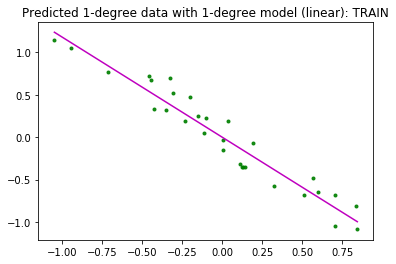

In [13]:
plot_data_with_prediction(x_1, y_1, x_1@w_1_reg, 'Predicted 1-degree data with 1-degree model (linear): TRAIN')

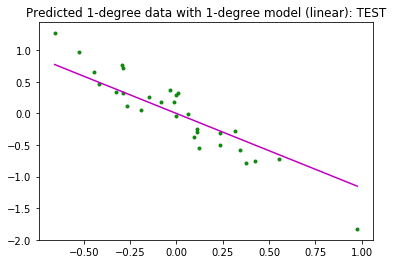

In [14]:
plot_data_with_prediction(x_1_test, y_1_test, x_1_test@w_1_reg, 'Predicted 1-degree data with 1-degree model (linear): TEST')

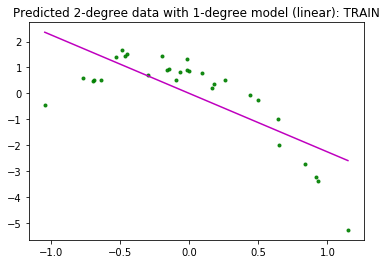

In [15]:
plot_data_with_prediction(x_2, y_2, x_2@w_2_reg, 'Predicted 2-degree data with 1-degree model (linear): TRAIN')

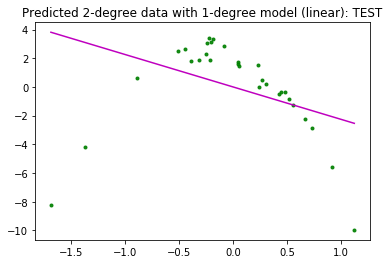

In [16]:
plot_data_with_prediction(x_2_test, y_2_test, x_2_test@w_2_reg, 'Predicted 2-degree data with 1-degree model (linear): TEST')

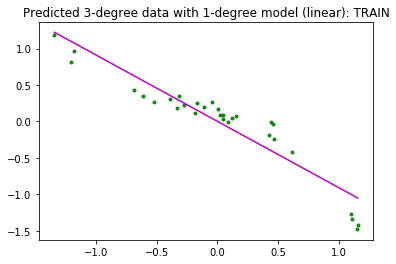

In [17]:
plot_data_with_prediction(x_3, y_3, x_3@w_3_reg, 'Predicted 3-degree data with 1-degree model (linear): TRAIN')

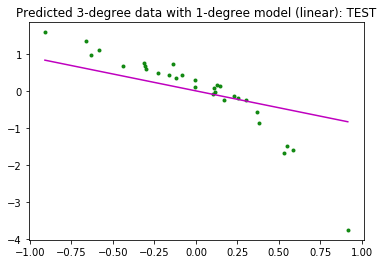

In [18]:
plot_data_with_prediction(x_3_test, y_3_test, x_3_test@w_3_reg, 'Predicted 3-degree data with 1-degree model (linear): TEST')

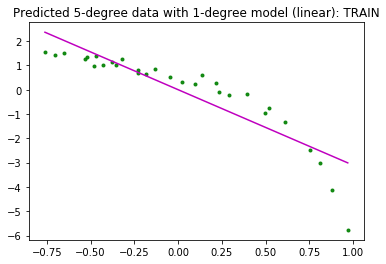

In [19]:
plot_data_with_prediction(x_5, y_5, x_5@w_5_reg, 'Predicted 5-degree data with 1-degree model (linear): TRAIN')

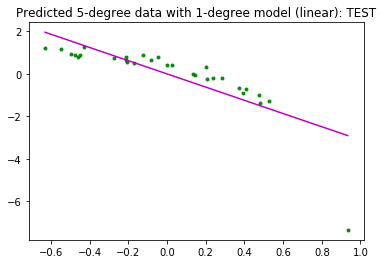

In [20]:
plot_data_with_prediction(x_5_test, y_5_test, x_5_test@w_5_reg, 'Predicted 5-degree data with 1-degree model (linear): TEST')

Polynomial Regression

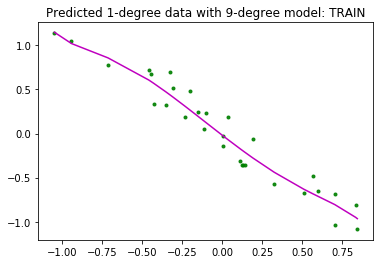

In [21]:
#overfit (too big model for linear data)
x_1_poly_9 = polynomial_x(x_1, p=9)
w_1_poly_9_reg = regularized_OLS(x_1_poly_9, y_1, lamda=0.03)
plot_data_with_prediction(x_1, y_1, x_1_poly_9@w_1_poly_9_reg, 'Predicted 1-degree data with 9-degree model: TRAIN')

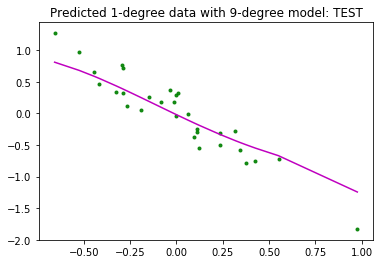

In [22]:
#overfit (too big model for linear data)
x_1_poly_9_test = polynomial_x(x_1_test, p=9)
plot_data_with_prediction(x_1_test, y_1_test, x_1_poly_9_test@w_1_poly_9_reg, 'Predicted 1-degree data with 9-degree model: TEST')

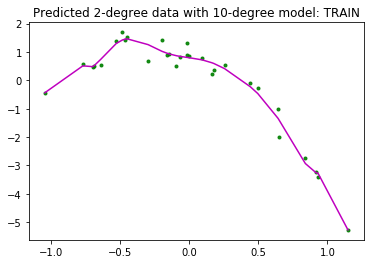

In [23]:
# overfit
w_2_poly_10_reg = regularized_OLS(polynomial_x(x_2, 10), y_2, lamda=0.)
plot_data_with_prediction(x_2, y_2, polynomial_x(x_2, 10)@w_2_poly_10_reg, 'Predicted 2-degree data with 10-degree model: TRAIN')

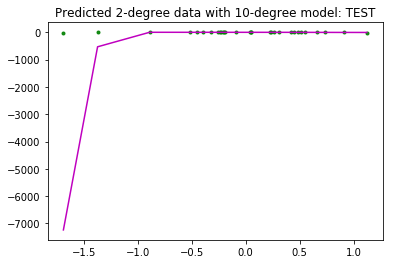

In [24]:
# overfit
plot_data_with_prediction(x_2_test, y_2_test, polynomial_x(x_2_test, 10)@w_2_poly_10_reg, 'Predicted 2-degree data with 10-degree model: TEST')

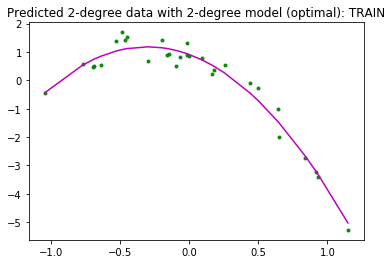

In [25]:
# optimal 
w_2_poly_2_reg = regularized_OLS(polynomial_x(x_2, 2), y_2, lamda=0.1)
plot_data_with_prediction(x_2, y_2, polynomial_x(x_2, 2)@w_2_poly_2_reg, 'Predicted 2-degree data with 2-degree model (optimal): TRAIN')

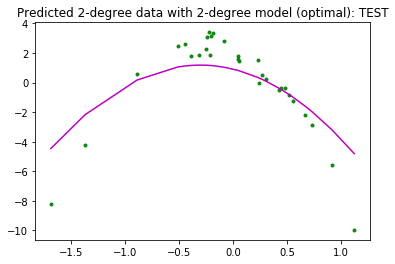

In [26]:
# optimal 
plot_data_with_prediction(x_2_test, y_2_test, polynomial_x(x_2_test, 2)@w_2_poly_2_reg, 'Predicted 2-degree data with 2-degree model (optimal): TEST')

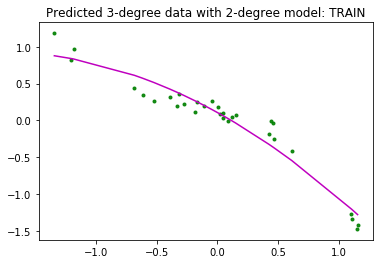

In [27]:
# not enough capacity 
w_3_poly_2_reg = regularized_OLS(polynomial_x(x_3, 2), y_3, lamda=0.1)
plot_data_with_prediction(x_3, y_3, polynomial_x(x_3, 2)@w_3_poly_2_reg, 'Predicted 3-degree data with 2-degree model: TRAIN')

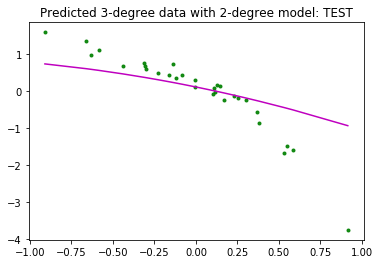

In [28]:
# not enough capacity 
plot_data_with_prediction(x_3_test, y_3_test, polynomial_x(x_3_test, 2)@w_3_poly_2_reg, 'Predicted 3-degree data with 2-degree model: TEST')

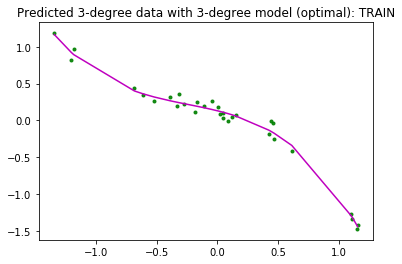

In [29]:
# optimal
w_3_poly_3_reg = regularized_OLS(polynomial_x(x_3, 3), y_3, lamda=0.1)
plot_data_with_prediction(x_3, y_3, polynomial_x(x_3, 3)@w_3_poly_3_reg, 'Predicted 3-degree data with 3-degree model (optimal): TRAIN')

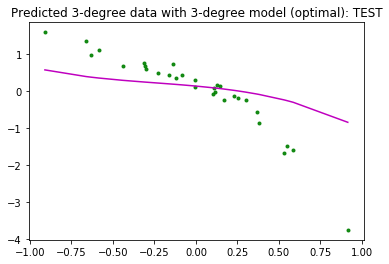

In [30]:
# optimal
plot_data_with_prediction(x_3_test, y_3_test, polynomial_x(x_3_test, 3)@w_3_poly_3_reg, 'Predicted 3-degree data with 3-degree model (optimal): TEST')

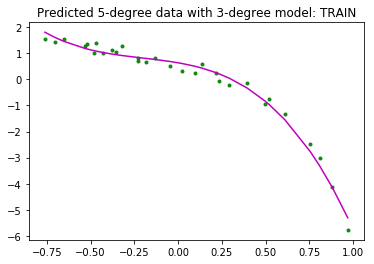

In [31]:
# not enough capacity
w_5_poly_3_reg = regularized_OLS(polynomial_x(x_5, 3), y_5, lamda=0.)
plot_data_with_prediction(x_5, y_5, polynomial_x(x_5, 3)@w_5_poly_3_reg, 'Predicted 5-degree data with 3-degree model: TRAIN')

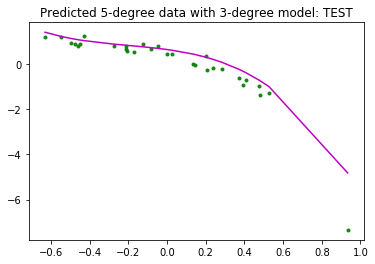

In [32]:
# not enough capacity
plot_data_with_prediction(x_5_test, y_5_test, polynomial_x(x_5_test, 3)@w_5_poly_3_reg, 'Predicted 5-degree data with 3-degree model: TEST')

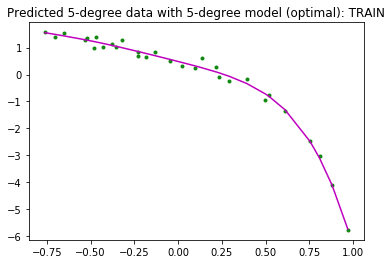

In [33]:
# optimal
w_5_poly_5_reg = regularized_OLS(polynomial_x(x_5, 5), y_5, lamda=0.)
plot_data_with_prediction(x_5, y_5, polynomial_x(x_5, 5)@w_5_poly_5_reg, 'Predicted 5-degree data with 5-degree model (optimal): TRAIN')

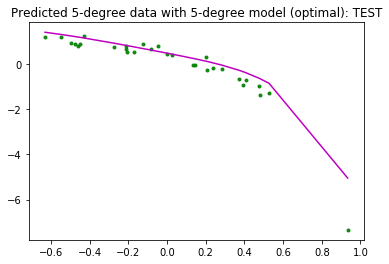

In [34]:
# optimal
plot_data_with_prediction(x_5_test, y_5_test, polynomial_x(x_5_test, 5)@w_5_poly_5_reg, 'Predicted 5-degree data with 5-degree model (optimal): TEST')

In [35]:
# optimal(linear) vs 2-degree: TRAIN
np.linalg.norm(y_1 - x_1@w_1_reg), np.linalg.norm(y_1 - polynomial_x(x_1, 2)@regularized_OLS( polynomial_x(x_1, 2),y_1))

(0.8719869815451554, 0.8721829928193666)

In [36]:
# optimal(linear) vs 2-degree: TEST
np.linalg.norm(y_1_test - x_1_test@w_1_reg), np.linalg.norm(y_1_test - polynomial_x(x_1_test, 2)@regularized_OLS(polynomial_x(x_1, 2),y_1))

(1.465329700666434, 1.4746790487728891)

In [37]:
# linear vs optimal(2-degree): TRAIN
np.linalg.norm(y_2 - x_2@w_2_reg), np.linalg.norm(y_2 - polynomial_x(x_2, 2)@regularized_OLS(polynomial_x(x_2, 2),y_2))

(5.8729697461356745, 1.7078959740357713)

In [38]:
# linear vs optimal(2-degree): TEST
np.linalg.norm(y_2_test - x_2_test@w_2_reg), np.linalg.norm(y_2_test - polynomial_x(x_2_test, 2)@regularized_OLS(polynomial_x(x_2, 2),y_2))

(18.293638416512586, 9.111073800259142)

In [39]:
# linear vs 2-degree vs optimal(3-degree): TRAIN
np.linalg.norm(y_3 - x_3@w_3_reg), np.linalg.norm(y_3 - polynomial_x(x_3, 2)@regularized_OLS(polynomial_x(x_3, 2),y_3)), np.linalg.norm(y_3 - polynomial_x(x_3, 3)@regularized_OLS(polynomial_x(x_3, 3),y_3))

(1.156174343734178, 0.857422646086356, 0.3730306200966185)

In [40]:
# linear vs 2-degree vs optimal(3-degree): TEST
np.linalg.norm(y_3_test - x_3_test@w_3_reg), np.linalg.norm(y_3_test - polynomial_x(x_3_test, 2)@regularized_OLS(polynomial_x(x_3, 2),y_3)), np.linalg.norm(y_3_test- polynomial_x(x_3_test, 3)@regularized_OLS(polynomial_x(x_3, 3),y_3))

(3.923093511209895, 3.8179518843904483, 4.330226305679338)

In [41]:
# Nearest neighbor regression
def predict_NN_reg(xx,yy, x_):
    '''
    xx - set
    yy - target var
    x_ - to predict
    '''
    return yy[np.argmax(np.linalg.norm(xx-x_, axis=1))-1]

In [42]:
# Figure 5.2

In [43]:
y_2_, x_2_ = cent_normalize(*generate_data_of_degree(p=2, m=10, n=1))

In [44]:
x_2__poly_9 = polynomial_x(x_2_, p=9)

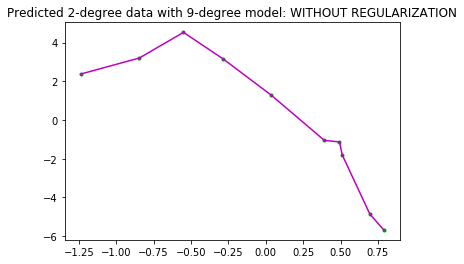

In [45]:
# overfit
w_2__poly_9_reg = regularized_OLS(x_2__poly_9, y_2_, lamda=0.0)
plot_data_with_prediction(x_2_, y_2_, x_2__poly_9@w_2__poly_9_reg, 'Predicted 2-degree data with 9-degree model: WITHOUT REGULARIZATION')

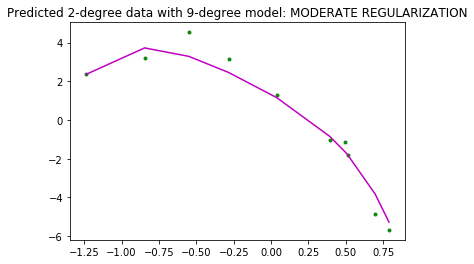

In [46]:
# get rid of overfitting
w_2__poly_9_reg = regularized_OLS(x_2__poly_9, y_2_, lamda=0.3)
plot_data_with_prediction(x_2_, y_2_, x_2__poly_9@w_2__poly_9_reg, 'Predicted 2-degree data with 9-degree model: MODERATE REGULARIZATION')

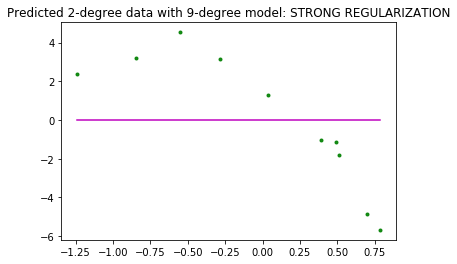

In [47]:
# constant function
w_2__poly_9_reg = regularized_OLS(x_2__poly_9, y_2_, lamda=1e10)
plot_data_with_prediction(x_2_, y_2_, x_2__poly_9@w_2__poly_9_reg, 'Predicted 2-degree data with 9-degree model: STRONG REGULARIZATION')

figure 5.4

In [48]:
# test_x, test_y = cent_normalize(*generate_data_of_degree(p=5, m=3000, n=1))
test_y, test_x = cent_normalize(*generate_data_of_degree(p=5, m=3000, n=1))

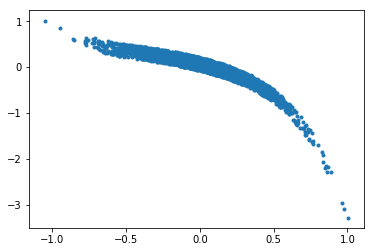

In [49]:
plt.scatter(test_x, test_y, marker='.')

In [50]:
train_sets = []
# sizes = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
sizes = np.linspace(5,1e5,30).astype(int)

for size in sizes:
    train_40_sets = []
    for i in range(40):
        train_y, train_x = cent_normalize(*generate_data_of_degree(p=5, m=int(size), n=1))
        train_40_sets.append((train_x, train_y))
    train_sets.append(train_40_sets)

In [51]:
np.array(train_sets).shape

(30, 40, 2)

In [52]:
np.array(train_sets)[0][0][0].shape, np.array(train_sets)[0][0][1].shape

((5, 1), (5, 1))

In [53]:
train_sets[1][0][0].shape, train_sets[1][0][1].shape

((3453, 1), (3453, 1))

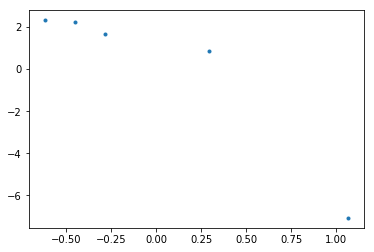

In [54]:
plt.scatter(train_sets[0][0][0], train_sets[0][0][1], marker='.')

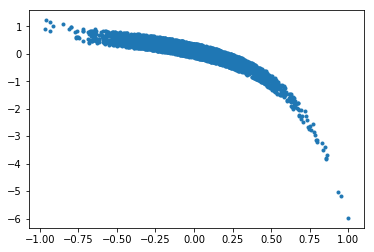

In [55]:
plt.scatter(train_sets[1][0][0], train_sets[1][0][1], marker='.')

In [56]:
test_x_poly_2 = polynomial_x(test_x, p=2)
test_x_poly_5 = polynomial_x(test_x, p=5)

In [57]:
def conf_interval(xx):
    '''
    95% confidence interval
    '''
    z = 1.96
    mean = xx.mean()
    std_dev = np.sqrt(((xx - mean)**2).sum()*1/xx.shape[0])
    bottom_border = mean - z*std_dev/np.sqrt(xx.shape[0])
    top_border = mean + z*std_dev/np.sqrt(xx.shape[0])
    
    return bottom_border, top_border

In [58]:
train_sets = np.array(train_sets)

In [59]:
train_sets.shape

(30, 40, 2)

In [60]:
from collections import defaultdict

train_errors_quadratic = defaultdict(list)
train_errors_optimal = defaultdict(list)

test_errors_quadratic = defaultdict(list)
test_errors_optimal = defaultdict(list)

# evaluating
for size in range(train_sets.shape[0]):
    for i in range(train_sets.shape[1]):
        train_x = train_sets[size][i][0]
        train_y = train_sets[size][i][1]
        
        # quadratic 
        x_5_poly_2 = polynomial_x(train_x,2)
        w_5_poly_2_reg = regularized_OLS(x_5_poly_2, train_y, lamda=0.1)
        y_pred_2 = x_5_poly_2@w_5_poly_2_reg
#         train_error_2 = np.linalg.norm(train_y - y_pred_2)
        train_error_2 = ((train_y - y_pred_2)**2).mean()
        train_errors_quadratic[size].append(train_error_2)
        
        # optimal (5-degree) 
        x_5_poly_5 = polynomial_x(train_x,5)
        w_5_poly_5_reg = regularized_OLS(x_5_poly_5, train_y, lamda=0.1)
        y_pred_5 = x_5_poly_5@w_5_poly_5_reg
#         train_error_5 = np.linalg.norm(train_y - y_pred_5)
        train_error_5 = ((train_y - y_pred_5)**2).mean()
        train_errors_optimal[size].append(train_error_5)
        
        # evaluate on test
        # quadratic
        y_pred_2_test = test_x_poly_2@w_5_poly_2_reg
#         test_error_2 = np.linalg.norm(test_y - y_pred_2_test)
        test_error_2 = ((test_y - y_pred_2_test)**2).mean()
        test_errors_quadratic[size].append(test_error_2)
        
        # optimal (5-degree) 
        y_pred_5_test = test_x_poly_5@w_5_poly_5_reg
#         test_error_5 = np.linalg.norm(test_y - y_pred_5_test)
        test_error_5 = ((test_y - y_pred_5_test)**2).mean()
        test_errors_optimal[size].append(test_error_5)

In [61]:
# train_errors_quadratic

In [62]:
# train_errors_optimal

In [63]:
# test_errors_quadratic

In [64]:
# test_errors_optimal

In [65]:
train_errors_mean_quad = []
train_errors_mean_optimal = []

train_errors_conf_int_quad = []
train_errors_conf_int_optimal = []

test_errors_mean_quad = []
test_errors_mean_optimal = []

test_errors_conf_int_quad = []
test_errors_conf_int_optimal = []

for size in range(train_sets.shape[0]):
    errors_quad = np.array(train_errors_quadratic[size])
    errors_optimal = np.array(train_errors_optimal[size])
    
    train_errors_mean_quad.append(errors_quad.mean())
    train_errors_mean_optimal.append(errors_optimal.mean())
    
    train_errors_conf_int_quad.append(conf_interval(errors_quad))
    train_errors_conf_int_optimal.append(conf_interval(errors_optimal))
    
    errors_quad_test = np.array(test_errors_quadratic[size])
    errors_optimal_test = np.array(test_errors_optimal[size])
    
    test_errors_mean_quad.append(errors_quad_test.mean())
    test_errors_mean_optimal.append(errors_optimal_test.mean())
    
    test_errors_conf_int_quad.append(conf_interval(errors_quad_test))
    test_errors_conf_int_optimal.append(conf_interval(errors_optimal_test))

In [66]:
train_errors_mean_quad

[4.277650144355243,
 0.02929866968444776,
 0.018717005970972006,
 0.020953747846166448,
 0.020626848365352734,
 0.022951726674850664,
 0.02333404252515922,
 0.017677051433790055,
 0.02855743313436515,
 0.021493571922689053,
 0.025819551559773956,
 0.03167121188329165,
 0.02039680555073483,
 0.019353378843502494,
 0.023098272285095044,
 0.01932178995303669,
 0.016893455279707807,
 0.019489967803760215,
 0.021432007996685105,
 0.020519831344771748,
 0.01846282735613186,
 0.020213690157534252,
 0.024843700847011693,
 0.023128690467219316,
 0.017652808061088737,
 0.02182584372712109,
 0.017235824469498798,
 0.021786355155196818,
 0.016186770600457846,
 0.019028516964975775]

In [67]:
train_errors_mean_optimal

[2.939415092724576,
 0.018533286768317177,
 0.012565777773138507,
 0.015161016921718656,
 0.015101186682566556,
 0.017329861058176545,
 0.018211531562341655,
 0.014129117512553718,
 0.02344831586696296,
 0.01730992654693731,
 0.021801372107755478,
 0.025780491003570362,
 0.016946857194865227,
 0.015944775635476343,
 0.01979090552652324,
 0.01611399174121434,
 0.014384286512443712,
 0.015896769158938832,
 0.018004269622480244,
 0.01733424695395725,
 0.01581136099195159,
 0.017394728532058465,
 0.021632837606406143,
 0.019953528993866994,
 0.015012932150977473,
 0.01886525999228844,
 0.015012241789325453,
 0.018856653191411478,
 0.01396856277795446,
 0.016462644426967238]

In [68]:
train_errors_conf_int_quad

[(-2.0720715112494412, 10.627371799959928),
 (0.024344617902162916, 0.0342527214667326),
 (0.014825060793125455, 0.022608951148818557),
 (0.016060139883658613, 0.025847355808674283),
 (0.014400769430014365, 0.026852927300691103),
 (0.0184292941905491, 0.027474159159152228),
 (0.019044828662088502, 0.02762325638822994),
 (0.014498601639918663, 0.020855501227661447),
 (0.0217779637455095, 0.0353369025232208),
 (0.016989930055881772, 0.025997213789496335),
 (0.014004402171355575, 0.03763470094819234),
 (0.01474698077527415, 0.048595442991309155),
 (0.01594013000307288, 0.02485348109839678),
 (0.014887328575819873, 0.023819429111185116),
 (0.014831036905180164, 0.03136550766500992),
 (0.013215108423630745, 0.025428471482442636),
 (0.012819225495394392, 0.020967685064021222),
 (0.014900969486136112, 0.02407896612138432),
 (0.01630265523720444, 0.02656136075616577),
 (0.016611806630404215, 0.02442785605913928),
 (0.013447920617546063, 0.023477734094717657),
 (0.014639919176850705, 0.02578746

In [69]:
train_errors_conf_int_optimal

[(-1.4126065751308508, 7.291436760580003),
 (0.014767697386302032, 0.02229887615033232),
 (0.009749040287700595, 0.015382515258576418),
 (0.011377782763143024, 0.018944251080294287),
 (0.010223519585074791, 0.01997885378005832),
 (0.013751874620106158, 0.020907847496246933),
 (0.014686849328351898, 0.02173621379633141),
 (0.011494678594371295, 0.01676355643073614),
 (0.017431739948533663, 0.029464891785392258),
 (0.013272268011615913, 0.02134758508225871),
 (0.011286774390744006, 0.03231596982476695),
 (0.011790009152439699, 0.03977097285470103),
 (0.012964863640012519, 0.020928850749717936),
 (0.012109963334437163, 0.019779587936515523),
 (0.012223997499619454, 0.027357813553427025),
 (0.010549637197227674, 0.02167834628520101),
 (0.010747722262091662, 0.018020850762795762),
 (0.012200006365914376, 0.01959353195196329),
 (0.013563474920360849, 0.02244506432459964),
 (0.013857461295718491, 0.020811032612196013),
 (0.01133604973060769, 0.02028667225329549),
 (0.012414330046665242, 0.022

In [70]:
test_errors_mean_quad

[27.484584272340932,
 0.05373444259999792,
 0.034893796918636755,
 0.03874571833955311,
 0.04339995493779206,
 0.04193712575366337,
 0.04228597200694155,
 0.03098009809377302,
 0.06029245031483008,
 0.04411029612311472,
 0.07053311077434896,
 0.09384400081284326,
 0.03886815882280366,
 0.03616316520228644,
 0.05222781817116149,
 0.04085838589586462,
 0.034689633936059235,
 0.03884653940690701,
 0.04550599040851338,
 0.03493341559700287,
 0.03445447548095909,
 0.04393218351498148,
 0.06426879340138421,
 0.04764141688046338,
 0.032676910539096424,
 0.04313704796508848,
 0.030933762046904956,
 0.05021220600853153,
 0.029020411874335173,
 0.03352494144405808]

In [71]:
test_errors_mean_optimal

[28.214402366764,
 0.06563534996455964,
 0.040435242011990266,
 0.0483864789818612,
 0.052753368681936405,
 0.05531941313333207,
 0.056990851212830804,
 0.03886348231626238,
 0.09272421864605235,
 0.06149854376286147,
 0.10311687618957488,
 0.1312079381698083,
 0.055880094131042876,
 0.0500743598276057,
 0.08007623777027,
 0.05749435803112442,
 0.04679075825035086,
 0.05318209982035845,
 0.06739769031139169,
 0.05144884776909566,
 0.04936351018378794,
 0.06127523053594301,
 0.0967587641450014,
 0.07485250892274709,
 0.0462092838213901,
 0.06460322145614976,
 0.04377203340996823,
 0.07183815572162473,
 0.038854813695873694,
 0.04886916459618162]

In [72]:
test_errors_conf_int_quad

[(-15.118149094348375, 70.08731763903023),
 (0.03858615584048334, 0.06888272935951249),
 (0.026463168355590885, 0.043324425481682624),
 (0.022884855788232194, 0.05460658089087403),
 (0.025278591493694397, 0.06152131838188972),
 (0.02907662241579781, 0.054797629091528924),
 (0.02881935565025362, 0.05575258836362948),
 (0.02295159897904117, 0.03900859720850487),
 (0.036816546883914156, 0.08376835374574601),
 (0.02512704620944804, 0.0630935460367814),
 (0.016216694146178053, 0.12484952740251987),
 (-0.0025596131786986692, 0.19024761480438518),
 (0.024517519064553715, 0.053218798581053606),
 (0.02272106233269959, 0.04960526807187329),
 (0.018743036835097912, 0.08571259950722507),
 (0.021204588662117784, 0.06051218312961146),
 (0.02155382447565578, 0.04782544339646269),
 (0.02277529839419625, 0.054917780419617764),
 (0.030087662768712976, 0.06092431804831378),
 (0.02434541577229961, 0.04552141542170614),
 (0.019102949127209334, 0.049806001834708846),
 (0.022672268053925495, 0.06519209897603

In [73]:
test_errors_conf_int_optimal

[(-15.933404951806033, 72.36220968533402),
 (0.04302661046664667, 0.0882440894624726),
 (0.027988807369853496, 0.05288167665412703),
 (0.026479989848802715, 0.07029296811491968),
 (0.026156558403671645, 0.07935017896020116),
 (0.035145749694443534, 0.07549307657222061),
 (0.03690477782520647, 0.07707692460045514),
 (0.025647471184403643, 0.05207949344812112),
 (0.052833221126331084, 0.1326152161657736),
 (0.030998053069552188, 0.09199903445617075),
 (0.018305964422033014, 0.18792778795711673),
 (-0.0009247971278023293, 0.26334067346741896),
 (0.03059351187106162, 0.08116667639102414),
 (0.027125956393567265, 0.07302276326164413),
 (0.019295782223525668, 0.14085669331701434),
 (0.022929428237307696, 0.09205928782494113),
 (0.023909133948371037, 0.06967238255233069),
 (0.029823328590909314, 0.07654087104980759),
 (0.0400390392426179, 0.09475634138016548),
 (0.03280439333754431, 0.07009330220064701),
 (0.021571749584606482, 0.07715527078296941),
 (0.028377208713145474, 0.09417325235874055

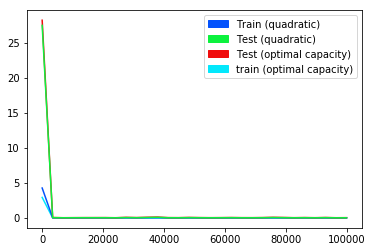

In [74]:
import matplotlib.patches as mpatches

plt.figure()

train_quad_patch = mpatches.Patch(color='#0352fc', label='Train (quadratic)')
test_quad_patch = mpatches.Patch(color='#0cf23e', label='Test (quadratic)')
test_opt_patch = mpatches.Patch(color='#f00c0c', label='Test (optimal capacity)')
train_opt_patch = mpatches.Patch(color='#03e8fc', label='train (optimal capacity)')

plt.legend(handles=[train_quad_patch, test_quad_patch, test_opt_patch, train_opt_patch])

plt.plot(sizes, train_errors_mean_optimal, c='#03e8fc')
plt.plot(sizes, train_errors_mean_quad, c='#0352fc')
plt.plot(sizes, test_errors_mean_optimal, c='#f00c0c')
plt.plot(sizes, test_errors_mean_quad, c='#0cf23e')

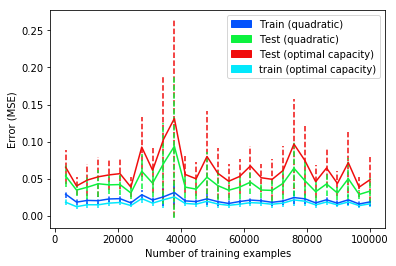

In [75]:
plt.figure()
plt.legend(handles=[train_quad_patch, test_quad_patch, test_opt_patch, train_opt_patch])

plt.xlabel("Number of training examples")
plt.ylabel("Error (MSE)")
plt.plot(sizes[1:], train_errors_mean_optimal[1:], c='#03e8fc')
for s in range(1,len(sizes)):
    plt.vlines(x=sizes[s], ymin=train_errors_conf_int_optimal[s][0], ymax=train_errors_conf_int_optimal[s][1], color='#03e8fc', linestyle='--')

plt.plot(sizes[1:], train_errors_mean_quad[1:], c='#0352fc')
for s in range(1,len(sizes)):
    plt.vlines(x=sizes[s], ymin=train_errors_conf_int_quad[s][0], ymax=train_errors_conf_int_quad[s][1], color='#0352fc', linestyle='--')

plt.plot(sizes[1:], test_errors_mean_optimal[1:], c='#f00c0c')
for s in range(1,len(sizes)):
    plt.vlines(x=sizes[s], ymin=test_errors_conf_int_optimal[s][0], ymax=test_errors_conf_int_optimal[s][1], color='#f00c0c', linestyle='--')

plt.plot(sizes[1:], test_errors_mean_quad[1:], c='#0cf23e')
for s in range(1,len(sizes)):
    plt.vlines(x=sizes[s], ymin=test_errors_conf_int_quad[s][0], ymax=test_errors_conf_int_quad[s][1], color='#0cf23e', linestyle='--')


In [76]:
y_2, x_2 = cent_normalize(*generate_data_of_degree(p=2, m=300, n=1))
y_2_test, x_2_test = cent_normalize(*generate_data_of_degree(p=2, m=100, n=1))

In [77]:
# linear
w_2_poly_1_reg = regularized_OLS(x_2, y_2, lamda=0.03)

In [78]:
((y_2 - x_2@w_2_poly_1_reg)**2).mean(), ((y_2_test - x_2_test@w_2_poly_1_reg)**2).mean()

(0.20805878719056628, 0.8912901055608144)

In [79]:
# optimal
w_2_poly_2_reg = regularized_OLS(polynomial_x(x_2, 2), y_2, lamda=0.03)

In [80]:
((y_2 - polynomial_x(x_2, 2)@w_2_poly_2_reg)**2).mean(), ((y_2_test - polynomial_x(x_2_test, 2)@w_2_poly_2_reg)**2).mean()

(0.03544148797061413, 0.6666004923294255)

In [81]:
# kfold

def kfoldXV(D, A, L, k):
    prev = 0
    e = []
    for i in range(1, k+1):
        D_i = D[prev:prev + int(D.shape[0]/k),:]
        krome_D_i = np.concatenate((D[:prev,:], D[prev + int(D.shape[0]/k):,:]))
#         print(D_i.shape, krome_D_i.shape)
        f_i = A(krome_D_i)
        e_i = L(D_i[:,:-1]@f_i, D_i[:,-1])
#         print(D_i[:,-1])
        e.append(e_i)
        prev += int(D.shape[0]/k)
    return np.array(e)

In [82]:
D = np.hstack((x_2,y_2))

In [83]:
D.shape

(300, 2)

In [84]:
def A(data):
    x_data = data[:,:-1]
    y_data = data[:,-1]

    return regularized_OLS(x_data, y_data, lamda=0.03)

In [85]:
def L(f_i, y_i):
    return ((f_i - y_i)**2).mean()

In [86]:
e = kfoldXV(D, A, L, 4)
e

array([0.16410828, 0.23812468, 0.21836883, 0.22796108])

In [87]:
conf_interval(e)

(0.18411479770604622, 0.2401666377679697)

In [88]:
e.mean()

0.21214071773700796

In [89]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4,random_state=0, shuffle=False)

e = []

for train_index, test_index in kf.split(D):
    krome_D_i_x, krome_D_i_y = D[train_index, :-1], D[train_index, -1]
    D_i_x, D_i_y = D[test_index, :-1], D[test_index, -1]
    f_i = regularized_OLS(krome_D_i_x, krome_D_i_y, lamda=0.03)
    e_i = L(D_i_x@f_i, D_i_y)
    e.append(e_i)

In [90]:
e

[0.16410828121195614,
 0.2381246790760516,
 0.21836883322435932,
 0.2279610774356647]

In [91]:
np.array(e).mean()

0.21214071773700793

In [92]:
conf_interval(np.array(e))

(0.18411479770604616, 0.2401666377679697)

In [93]:
D = np.hstack((polynomial_x(x_2,p=2),y_2))

In [94]:
e = kfoldXV(D, A, L, 4)
e

array([0.03221673, 0.0378014 , 0.03467309, 0.03938523])

In [95]:
e.mean()

0.036019110821722405

In [96]:
conf_interval(e)

(0.03330072909652297, 0.03873749254692184)

In [161]:
kf = KFold(n_splits=4,random_state=0, shuffle=False)

e = []

for train_index, test_index in kf.split(D):
    krome_D_i_x, krome_D_i_y = D[train_index, :-1], D[train_index, -1]
    D_i_x, D_i_y = D[test_index, :-1], D[test_index, -1]
    f_i = regularized_OLS(krome_D_i_x, krome_D_i_y, lamda=0.03)
    e_i = L(D_i_x@f_i, D_i_y)
    e.append(e_i)

In [162]:
e

[0.032216728329715,
 0.03780139567757665,
 0.034673090486722555,
 0.0393852287928754]

In [163]:
np.array(e).mean()

0.036019110821722405

In [164]:
conf_interval(np.array(e))

(0.03330072909652297, 0.03873749254692184)

K-means

In [177]:
# generate data

def generate_k_clusters(k=3):
    data = []
    for i in range(1,k+1):
        data_i = 2*np.random.rand(100+np.random.randint(-20,20), 2) + i
        print(data_i.shape)
        data.append(data_i)
    return np.array(data)

In [178]:
data = generate_k_clusters()

(82, 2)
(119, 2)
(115, 2)


In [179]:
def plot_data(data):
    # with k = 3
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(data[0][:,0], data[0][:,1], s=10, c='b', marker="o", label='first')
    ax1.scatter(data[1][:,0], data[1][:,1], s=10, c='g', marker="o", label='second')
    ax1.scatter(data[2][:,0], data[2][:,1], s=10, c='r', marker="o", label='third')
    plt.legend(loc='upper right');
    plt.show()

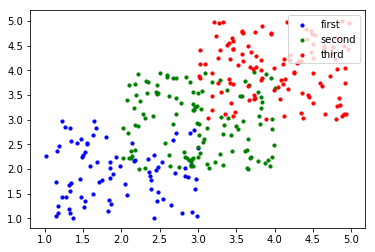

In [180]:
plot_data(data)

In [185]:
data_ = np.concatenate(data)
data_.shape

(316, 2)

In [190]:
data_[np.random.randint(0, data_.shape[0],3)]

array([[3.40925876, 4.55850334],
       [2.42250151, 2.27855725],
       [2.82396726, 1.84863101]])

In [256]:
def k_means(data, epochs=100, k=3):
    clusterer_data = []
    centroids = data[np.random.randint(0, data.shape[0],k)]
    for i in range(epochs):
        clusters = np.argmin(np.array([np.linalg.norm(data_-centroids[i],axis=1) for i in range(k)]),axis=0)
#         print(centroids)
        for j in range(k):
            centroids[j] = data[np.where(clusters==j)].mean(0)
            
    for i in range(k):
        clusterer_data.append(data[np.where(clusters==i)])
    return np.array(clusterer_data)

In [257]:
clustered_data = k_means(data_)

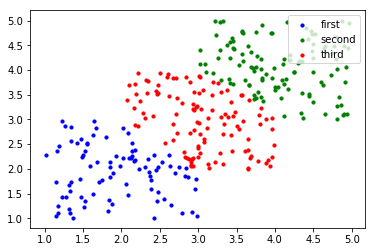

In [258]:
plot_data(clustered_data)

In [259]:
clustered_data_5 = k_means(data_, k=5)

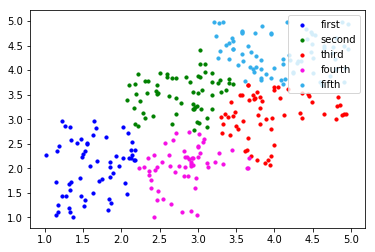

In [260]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(clustered_data_5[0][:,0], clustered_data_5[0][:,1], s=10, c='b', marker="o", label='first')
ax1.scatter(clustered_data_5[1][:,0], clustered_data_5[1][:,1], s=10, c='g', marker="o", label='second')
ax1.scatter(clustered_data_5[2][:,0], clustered_data_5[2][:,1], s=10, c='r', marker="o", label='third')
ax1.scatter(clustered_data_5[3][:,0], clustered_data_5[3][:,1], s=10, c='#f50fe5', marker="o", label='fourth')
ax1.scatter(clustered_data_5[4][:,0], clustered_data_5[4][:,1], s=10, c='#34aeeb', marker="o", label='fifth')
plt.legend(loc='upper right');
plt.show()